In [26]:
import pandas as pd
import numpy as np
import psycopg2 as pg

In [27]:
participant = pd.read_csv(r'/Users/natchapon/Documents/data_sci/ds004515/participants.tsv' , sep='\t')

participant

,participant_id,Original_ID,sex,age,GROUP,BDI,AUDIT,EDUCATION
0,sub-001,10600,F,43,CTL,14,1,16
1,sub-002,10601,F,50,CTL,2,2,16
2,sub-003,10602,F,22,CTL,2,1,18
3,sub-004,10603,F,18,CTL,0,1,13
4,sub-005,10604,M,31,CTL,1,1,14
5,sub-006,10605,F,24,CTL,8,3,19
6,sub-007,10606,M,44,ALC,5,7,16
7,sub-008,10607,M,38,ALC,42,27,13
8,sub-009,10608,M,32,ALC,1,11,16
9,sub-010,10609,F,54,ALC,17,9,12


In [28]:
conn = pg.connect(
    host="localhost",
    database="eeg",
    user="admin",
    password="admin123",
    port=5432
)

cur = conn.cursor()

In [29]:

participant_id = participant['participant_id']
participant_group = participant['GROUP']


participant_id

participant_group

0     CTL
1     CTL
2     CTL
3     CTL
4     CTL
5     CTL
6     ALC
7     ALC
8     ALC
9     ALC
10    ALC
11    ALC
12    ALC
13    ALC
14    ALC
15    ALC
16    ALC
17    ALC
18    CTL
19    CTL
20    ALC
21    ALC
22    ALC
23    ALC
24    ALC
25    ALC
26    ALC
27    ALC
28    ALC
29    ALC
30    ALC
31    ALC
32    ALC
33    ALC
34    ALC
35    CTL
36    CTL
37    ALC
38    CTL
39    CTL
40    CTL
41    CTL
42    CTL
43    CTL
44    CTL
45    CTL
46    CTL
47    CTL
48    CTL
49    CTL
50    CTL
51    CTL
52    CTL
53    CTL
Name: GROUP, dtype: object

In [30]:

import mne

def insert_data_eeg(participant_id):
    filePath = rf'/Users/natchapon/Documents/data_sci/ds004515/{participant_id}/eeg/{participant_id}_task-ProbabilisticSelection_eeg.set'
    raw = mne.io.read_raw_eeglab(filePath)
    eegData = raw.get_data()
    ch_names = raw.ch_names

    for i in range(len(ch_names)):
        ch_name = ch_names[i]
        ch_data = eegData[i]
        name = ch_name.lower()
        data = sum(ch_data) / len(ch_data)

        if len(name.split(' ')) >= 2:
            name = '_'.join(name.split(' '))
        else:
            name = name

        sqlinsert = f"INSERT INTO eeg_data (participant_id, {name}) VALUES ('{participant_id}', {data})"
        sqlupdate = f"UPDATE eeg_data SET {name} = {data} WHERE participant_id = '{participant_id}'"

        if i == 0:
            cur.execute(sqlinsert)
            conn.commit()
        else:
            cur.execute(sqlupdate)
            conn.commit()
    



In [31]:
for i in range(len(participant_id)):
    try:
        insert_data_eeg(participant_id[i])
    except Exception as e:
        print(f"Error inserting data for participant {participant_id[i]}: {e}")
        conn.rollback()

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-001/eeg/sub-001_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-002/eeg/sub-002_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-003/eeg/sub-003_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-004/eeg/sub-004_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-004: column "ft9" of relation "eeg_data" does not exist
LINE 1: UPDATE eeg_data SET ft9 = -0.010146454528895253 WHERE partic...
                            ^

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-005/eeg/sub-005_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-005: column "ft9" of relation "eeg_data" does not exist
LINE 1: UPDATE eeg_data SET ft9 = -0.024506568563852582 WHERE partic...
                            ^

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-006/eeg/sub-006_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-007/eeg/sub-007_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-008/eeg/sub-008_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-009/eeg/sub-009_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-010/eeg/sub-010_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-011/eeg/sub-011_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-012/eeg/sub-012_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-013/eeg/sub-013_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-014/eeg/sub-014_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-015/eeg/sub-015_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-016/eeg/sub-016_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-017/eeg/sub-017_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-018/eeg/sub-018_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-019/eeg/sub-019_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-020/eeg/sub-020_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-021/eeg/sub-021_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-021: column "ft9" of relation "eeg_data" does not exist
LINE 1: UPDATE eeg_data SET ft9 = -0.0016845392495547186 WHERE parti...
                            ^

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-022/eeg/sub-022_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-022: column "ft9" of relation "eeg_data" does not exist
LINE 1: UPDATE eeg_data SET ft9 = -0.011076317632348013 WHERE partic...
                            ^

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-023/eeg/sub-023_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-023: column "ft9" of relation "eeg_data" does not exist
LINE 1: UPDATE eeg_data SET ft9 = -0.016077003355977913 WHERE partic...
                            ^

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-024/eeg/sub-024_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-024: column "ft9" of relation "eeg_data" does not exist
LINE 1: UPDATE eeg_data SET ft9 = 0.016795412030821556 WHERE partici...
                            ^

Reading /Users/natchapon/Documents/data_sci/ds004515/sub-025/eeg/sub-025_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-026/eeg/sub-026_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-027/eeg/sub-027_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-028/eeg/sub-028_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-029/eeg/sub-029_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-030/eeg/sub-030_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-031/eeg/sub-031_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-032/eeg/sub-032_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-033/eeg/sub-033_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-034/eeg/sub-034_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-035/eeg/sub-035_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-036/eeg/sub-036_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-037/eeg/sub-037_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-038/eeg/sub-038_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-039/eeg/sub-039_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-040/eeg/sub-040_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-041/eeg/sub-041_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-042/eeg/sub-042_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-043/eeg/sub-043_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-044/eeg/sub-044_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-045/eeg/sub-045_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-046/eeg/sub-046_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-047/eeg/sub-047_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-048/eeg/sub-048_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-049/eeg/sub-049_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-050/eeg/sub-050_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-051/eeg/sub-051_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-052/eeg/sub-052_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-053/eeg/sub-053_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading /Users/natchapon/Documents/data_sci/ds004515/sub-054/eeg/sub-054_task-ProbabilisticSelection_eeg.fdt


/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1784186673.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


In [32]:
rawDataSQl = pd.read_sql_query("SELECT * FROM eeg_data", conn)

rawDataSQl

/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/3291162496.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rawDataSQl = pd.read_sql_query("SELECT * FROM eeg_data", conn)


,participant_id,fp1,fz,f3,f7,below_eye,fc5,fc1,c3,t7,...,c2,fc4,ft8,f6,f2,af4,af8,empty,ekg,audiooutput
0,sub-040,-0.003777,0.001629,0.004618,0.007591,-0.012560,0.000633,0.008017,0.002405,0.006219,...,0.000610,0.004524,-0.014736,0.003725,0.001829,-0.002208,-0.000135,0.012523,-1.346364,0.002399
1,sub-038,-0.033660,-0.001765,-0.012161,-0.019336,-0.037943,0.000951,-0.008832,0.000273,-0.005543,...,-0.007977,-0.016760,-0.015461,-0.003301,-0.005819,-0.019429,-0.017650,0.012533,-0.015123,0.002376
2,sub-042,-0.022187,-0.018431,-0.017252,-0.017319,-0.014809,-0.001071,-0.009401,-0.000777,-0.000968,...,0.000226,-0.009453,-0.011647,-0.010740,-0.005030,-0.006930,-0.004330,0.012517,-0.447032,0.002381
3,sub-046,0.016337,0.007892,-0.005101,0.004846,0.003703,0.005604,-0.004049,0.002857,-0.004978,...,0.005497,0.021531,0.010498,-0.000772,0.024353,0.000548,-0.003559,0.012418,-0.716166,0.002380
4,sub-043,-0.007540,0.011554,-0.003990,-0.001310,-0.007328,-0.000084,-0.000146,0.004025,-0.000780,...,0.004153,0.006771,0.002368,0.007011,0.002105,-0.004701,-0.013563,0.012420,-1.083249,0.002370
5,sub-041,-0.008371,0.000245,-0.009281,-0.003000,-0.015570,0.001018,-0.003218,0.007129,-0.014805,...,0.006650,-0.002724,-0.008276,0.005639,0.005128,-0.008720,-0.021106,0.012515,-0.490343,0.002397
6,sub-036,0.001529,0.001408,-0.005508,-0.012362,-0.011743,-0.003125,-0.002425,-0.002463,0.003823,...,-0.001891,-0.012248,-0.019721,0.000248,-0.007371,-0.003281,-0.012928,0.012365,0.728034,0.002414
7,sub-037,-0.022464,-0.022063,-0.017743,-0.027273,-0.018002,-0.010503,-0.015123,-0.007808,-0.015364,...,0.001114,-0.016360,-0.015877,-0.010257,-0.019731,-0.017743,-0.019444,0.012538,0.078153,0.002373
8,sub-039,0.010320,0.025463,0.011351,0.028762,0.012944,0.000745,0.026632,0.020138,0.010270,...,0.010249,0.015135,0.007428,0.020085,0.010579,0.029482,0.007482,0.012496,-0.207660,0.002457
9,sub-045,0.020870,0.023257,0.013297,0.026966,0.004097,0.029131,0.019025,0.018251,0.031693,...,0.028374,0.011032,-0.005392,0.023527,0.023697,0.015078,0.000156,0.012270,-0.413792,0.002360


In [33]:
mergeDF = pd.merge(participant, rawDataSQl, on='participant_id')

mergeDF.to_csv(r'/Users/natchapon/Documents/data_sci/merge_data.csv', index=False)

# loadData 

In [34]:
eeg_state = pd.read_csv(r'/Users/natchapon/Documents/data_sci/merge_data.csv')

In [35]:
eeg_state.sample(5)

,participant_id,Original_ID,sex,age,GROUP,BDI,AUDIT,EDUCATION,fp1,fz,...,c2,fc4,ft8,f6,f2,af4,af8,empty,ekg,audiooutput
35,sub-036,10637,F,31,CTL,4,1,22,0.001529,0.001408,...,-0.001891,-0.012248,-0.019721,0.000248,-0.007371,-0.003281,-0.012928,0.012365,0.728034,0.002414
2,sub-003,10602,F,22,CTL,2,1,18,-0.026259,-0.000343,...,-0.001402,-0.009827,-0.016021,-0.013534,0.005141,0.000050,-0.023162,0.012644,1.379198,0.002720
29,sub-030,10631,F,45,ALC,8,7,17,-0.014556,0.001812,...,0.001877,-0.009227,-0.003940,0.005818,-0.012381,0.006570,-0.014482,0.012458,-0.428367,0.002377
0,sub-001,10600,F,43,CTL,14,1,16,-0.006885,0.001531,...,-0.006757,-0.000072,-0.013844,-0.011792,-0.009998,-0.012524,-0.025626,0.012368,1.830811,0.002748
9,sub-010,10609,F,54,ALC,17,9,12,-0.003868,-0.002087,...,-0.002402,-0.006424,-0.008929,-0.000462,-0.003708,-0.001394,-0.005028,0.012398,0.233600,0.002816


In [36]:
eeg_state = eeg_state.drop(columns=['participant_id','Original_ID','sex','age','EDUCATION'])

<Axes: ylabel='count'>

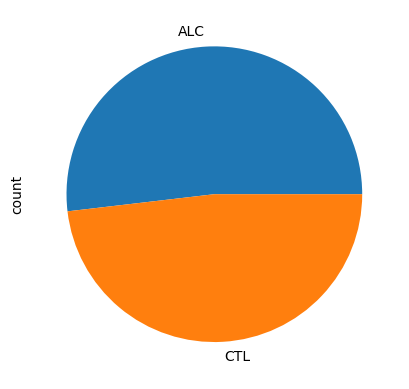

In [37]:
eeg_state['GROUP'].value_counts().plot(kind='pie')

In [38]:
nan_per_rows = eeg_state.isnull().sum(axis=1)

27


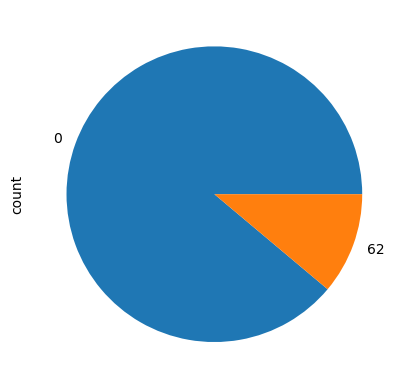

In [39]:
nan_per_rows.value_counts().plot(kind='pie')

nan_mean_values = int(nan_per_rows.value_counts().mean())
print(nan_mean_values)

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_classification_report(y_true, y_pred, target_names, class_indices):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Initialize lists to store precision, recall, F1-score, and support for each class
    precision = []
    recall = []
    f1_score = []
    support = []

    # Calculate precision, recall, F1-score for each class
    for i in range(len(target_names)):
        true_positives = cm[i, i]
        false_positives = cm[:, i].sum() - true_positives
        false_negatives = cm[i, :].sum() - true_positives
        true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)

        # Precision: TP / (TP + FP)
        if true_positives + false_positives > 0:
            precision_i = true_positives / (true_positives + false_positives)
        else:
            precision_i = 0.0

        # Recall: TP / (TP + FN)
        if true_positives + false_negatives > 0:
            recall_i = true_positives / (true_positives + false_negatives)
        else:
            recall_i = 0.0

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if precision_i + recall_i > 0:
            f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
        else:
            f1_i = 0.0

        # Support: The number of true instances of each class
        support_i = cm[i, :].sum()

        # Append calculated metrics for this class
        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_i)
        support.append(support_i)

    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate average F1-score for specified classes
    f1_average = np.mean([f1_score[i] for i in class_indices])

    # Print the aesthetically improved report
    print("\n" + "Classification Report".center(65, "="))
    print(f"{'Class':<15}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}{'Support':>12}")
    print("=" * 65)
    for i, label in enumerate(target_names):
        print(f"{label:<15}{precision[i]:>12.4f}{recall[i]:>12.4f}{f1_score[i]:>12.4f}{support[i]:>12}")
    print("=" * 65)
    print(f"Average F1-Score for classes : {f1_average:.4f}")
    print("=" * 65)

class_indices = [0, 1]

In [41]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# drop rows with missing values over nan_mean_values
eeg_state_cleaned = eeg_state.dropna(thresh=eeg_state.shape[1] - nan_mean_values)
# eeg_state_cleaned = eeg_data.dropna(thresh=eeg_data.shape[1]-11)



le = LabelEncoder()
eeg_state_cleaned['GROUP'] = le.fit_transform(eeg_state_cleaned['GROUP'])

# Convert object columns to numeric
for col in eeg_state_cleaned.columns:
    if eeg_state_cleaned[col].dtype == 'object':
        eeg_state_cleaned[col] = pd.to_numeric(eeg_state_cleaned[col], errors='coerce')

# Features and target
X = eeg_state_cleaned.drop('GROUP', axis=1)
y = eeg_state_cleaned['GROUP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

params = {
    'objective': 'multi:softmax',
    'num_class': 2,  # Number of classes
    'learning_rate': 0.2087759602169422,
    'max_depth': 10,
    'subsample': 0.6478457734751482,
    'colsample_bytree': 0.9431214021788126,
    # 'device': 'cuda',  # Use GPU
    'random_state': 42,
}

train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.train(params, train_data,num_boost_round=462)

# Predict the class labels
y_pred = xgb_model.predict(test_data)

/var/folders/y1/krwkffws1550dmpyl_kr36zw0000gn/T/ipykernel_47108/1929397760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_state_cleaned['GROUP'] = le.fit_transform(eeg_state_cleaned['GROUP'])


In [42]:
print("Expected features:", xgb_model.feature_names)
print("Dataset columns:", eeg_state_cleaned.columns.tolist())

Expected features: ['BDI', 'AUDIT', 'fp1', 'fz', 'f3', 'f7', 'below_eye', 'fc5', 'fc1', 'c3', 't7', 'left_mastoid', 'cp5', 'cp1', 'pz', 'p3', 'p7', 'o1', 'oz', 'o2', 'p4', 'p8', 'right_mastoid', 'cp6', 'cp2', 'cz', 'c4', 't8', 'above_eye', 'fc6', 'fc2', 'f4', 'f8', 'fp2', 'af7', 'af3', 'afz', 'f1', 'f5', 'ft7', 'fc3', 'fcz', 'c1', 'c5', 'tp7', 'cp3', 'p1', 'p5', 'po7', 'po3', 'poz', 'po4', 'po8', 'p6', 'p2', 'cp4', 'tp8', 'c6', 'c2', 'fc4', 'ft8', 'f6', 'f2', 'af4', 'af8', 'empty', 'ekg', 'audiooutput']
Dataset columns: ['GROUP', 'BDI', 'AUDIT', 'fp1', 'fz', 'f3', 'f7', 'below_eye', 'fc5', 'fc1', 'c3', 't7', 'left_mastoid', 'cp5', 'cp1', 'pz', 'p3', 'p7', 'o1', 'oz', 'o2', 'p4', 'p8', 'right_mastoid', 'cp6', 'cp2', 'cz', 'c4', 't8', 'above_eye', 'fc6', 'fc2', 'f4', 'f8', 'fp2', 'af7', 'af3', 'afz', 'f1', 'f5', 'ft7', 'fc3', 'fcz', 'c1', 'c5', 'tp7', 'cp3', 'p1', 'p5', 'po7', 'po3', 'poz', 'po4', 'po8', 'p6', 'p2', 'cp4', 'tp8', 'c6', 'c2', 'fc4', 'ft8', 'f6', 'f2', 'af4', 'af8', 'empty

In [43]:
target_names=list(map(str,le.classes_))

In [44]:
# Generate and print classification report
report = custom_classification_report(y_test, y_pred, target_names=target_names,class_indices = [0, 1])
print(report)


======================Classification Report======================
Class             Precision      Recall    F1-Score     Support
ALC                  1.0000      1.0000      1.0000           5
CTL                  1.0000      1.0000      1.0000           5
Average F1-Score for classes : 1.0000
None


In [45]:
from sklearn.metrics import accuracy_score

# Predict the class labels
y_pred = xgb_model.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [46]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 55, 128)  # Adjust the input size based on the output of conv2
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()

# Calculate the correct input size for fc1
with torch.no_grad():
    dummy_input = torch.zeros(1, 1, X_train.shape[1])
    dummy_output = model.conv1(dummy_input)
    dummy_output = model.maxpool(dummy_output)
    dummy_output = model.conv2(dummy_output)
    dummy_output = model.maxpool(dummy_output)
    fc1_input_size = dummy_output.view(dummy_output.size(0), -1).size(1)

model.fc1 = nn.Linear(fc1_input_size, 128)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: 0.7016
Epoch [2/20], Loss: 0.5802
Epoch [3/20], Loss: 0.5176
Epoch [4/20], Loss: 0.5567
Epoch [5/20], Loss: 0.5143
Epoch [6/20], Loss: 0.4184
Epoch [7/20], Loss: 0.5059
Epoch [8/20], Loss: 0.4789
Epoch [9/20], Loss: 0.3400
Epoch [10/20], Loss: 0.3436
Epoch [11/20], Loss: 0.1569
Epoch [12/20], Loss: 0.1748
Epoch [13/20], Loss: 0.2781
Epoch [14/20], Loss: 0.2094
Epoch [15/20], Loss: 0.0824
Epoch [16/20], Loss: 0.0391
Epoch [17/20], Loss: 0.2546
Epoch [18/20], Loss: 0.0803
Epoch [19/20], Loss: 0.0245
Epoch [20/20], Loss: 0.0858
F1 Score: 1.0000
Accuracy: 100.00%


In [47]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_layers = 2
num_classes = 2

model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: 0.6957
Epoch [2/20], Loss: 0.6681
Epoch [3/20], Loss: 0.6469
Epoch [4/20], Loss: 0.6059
Epoch [5/20], Loss: 0.6308
Epoch [6/20], Loss: 0.5791
Epoch [7/20], Loss: 0.5253
Epoch [8/20], Loss: 0.3532
Epoch [9/20], Loss: 0.3425
Epoch [10/20], Loss: 0.6019
Epoch [11/20], Loss: 0.2624
Epoch [12/20], Loss: 0.3619
Epoch [13/20], Loss: 0.4226
Epoch [14/20], Loss: 0.1423
Epoch [15/20], Loss: 0.1263
Epoch [16/20], Loss: 0.0894
Epoch [17/20], Loss: 0.2016
Epoch [18/20], Loss: 0.1925
Epoch [19/20], Loss: 0.1202
Epoch [20/20], Loss: 0.2403
F1 Score: 1.0000
Accuracy: 100.00%


In [48]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the CNN+LSTM model
class CNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(32, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_layers = 2
num_classes = 2

model = CNNLSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: 0.7044
Epoch [2/20], Loss: 0.6931
Epoch [3/20], Loss: 0.7022
Epoch [4/20], Loss: 0.6910
Epoch [5/20], Loss: 0.6942
Epoch [6/20], Loss: 0.6867
Epoch [7/20], Loss: 0.6900
Epoch [8/20], Loss: 0.6869
Epoch [9/20], Loss: 0.6846
Epoch [10/20], Loss: 0.6933
Epoch [11/20], Loss: 0.6899
Epoch [12/20], Loss: 0.5781
Epoch [13/20], Loss: 0.4584
Epoch [14/20], Loss: 0.2363
Epoch [15/20], Loss: 0.0971
Epoch [16/20], Loss: 1.0972
Epoch [17/20], Loss: 0.5192
Epoch [18/20], Loss: 0.4819
Epoch [19/20], Loss: 0.0526
Epoch [20/20], Loss: 0.0351
F1 Score: 1.0000
Accuracy: 100.00%
